#**ANDRES BANQUEZ CABARCAS**
**1001021432**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Cargamos el dataset train.csv

In [3]:
train = pd.read_csv('train.csv')
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


Primero observamos cuantos datos faltantes hay, de manera que podemos manejarlos.

In [4]:
train.ID.size

692500

In [5]:
train.isnull().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


Hay que tener en cuenta que son un total de 301468 datos, por lo que igualmente en el peor de los casos 13925 equivale unicamente al 4.61% de los datos, de manera que consideramos que agregar datos no dañara los resultados.

En este caso entonces decidimos añadir los datos faltantes en forma de la moda, esto no fue arbitrario sino fue hecho porque los datos son de tipo objeto, por lo que en varios casos realmente no representan un valor numerico.

In [6]:
train = train.apply(lambda x: x.fillna(x.value_counts().index[0]))
train.isnull().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,0
ESTU_HORASSEMANATRABAJA,0
FAMI_ESTRATOVIVIENDA,0
FAMI_TIENEINTERNET,0
FAMI_EDUCACIONPADRE,0
FAMI_EDUCACIONMADRE,0


Ahora revisamos cuales son los valores únicos de cada columna

In [7]:
train.nunique()

,0
ID,692500
PERIODO,9
ESTU_PRGM_ACADEMICO,948
ESTU_PRGM_DEPARTAMENTO,31
ESTU_VALORMATRICULAUNIVERSIDAD,8
ESTU_HORASSEMANATRABAJA,5
FAMI_ESTRATOVIVIENDA,7
FAMI_TIENEINTERNET,2
FAMI_EDUCACIONPADRE,12
FAMI_EDUCACIONMADRE,12


El ID y el periodo podemos no tomarlos en cuenta directamente porque no representan un efecto directo con el rendimiento global.

In [8]:
train = train.drop('ID', axis=1)
train = train.drop('PERIODO', axis=1)
train.head()

,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


Los valores de matricula universidad los convertimos a numericos ordenandolos de 1 a n de menor a mayor de los gastos de matricula.

In [9]:
valores = train.ESTU_VALORMATRICULAUNIVERSIDAD.unique()
valores

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula'], dtype=object)

In [10]:
def cambio(x):
  try:
    newval = x.split(' ')[1]
    newval2 = x.split(' ')[2]
    newval = float(newval)
    if x.split(' ')[2] == 'mil':
      newval = newval/1000
    return newval
  except:
    try:
      newval = float(newval2)
      if x.split(' ')[0] == 'Menos':
        newval = .25
    except:
      return 0
    return newval
valores2 = list(map(cambio, valores))
valores2

[5.5, 2.5, 4.0, 7.0, 1.0, 0.5, 0.25, 0]

In [11]:
replacement = dict(zip(valores, valores2))
replacement

{'Entre 5.5 millones y menos de 7 millones': 5.5,
 'Entre 2.5 millones y menos de 4 millones': 2.5,
 'Entre 4 millones y menos de 5.5 millones': 4.0,
 'Más de 7 millones': 7.0,
 'Entre 1 millón y menos de 2.5 millones': 1.0,
 'Entre 500 mil y menos de 1 millón': 0.5,
 'Menos de 500 mil': 0.25,
 'No pagó matrícula': 0}

In [12]:
# utilizar este diccionario para reemplzar los valores de la columna
train['ESTU_VALORMATRICULAUNIVERSIDAD'] = train['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(replacement)
train

<ipython-input-12-e68d0c11ce7e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['ESTU_VALORMATRICULAUNIVERSIDAD'] = train['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(replacement)


,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,ENFERMERIA,BOGOTÁ,5.5,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,DERECHO,ATLANTICO,2.5,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,2.5,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,ADMINISTRACION DE EMPRESAS,SANTANDER,4.0,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,PSICOLOGIA,ANTIOQUIA,2.5,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...
692495,BIOLOGIA,LA GUAJIRA,0.5,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,PSICOLOGIA,NORTE SANTANDER,2.5,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,1.0,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,PSICOLOGIA,TOLIMA,2.5,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo


# Ahora haremos lo mismo con horas trabaja semana

In [13]:
valores = train.ESTU_HORASSEMANATRABAJA.unique()
valores

array(['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas'], dtype=object)

In [14]:
def cambio(x):
  xsplited = x.split(' ')
  if len(xsplited) == 1:
    return 0
  xsplited = list(filter(lambda x: True if str(x).isdigit() else False, map(lambda x: int(x) if x.isdigit() else x, xsplited)))
  return xsplited[0]

In [15]:
valores2 = list(map(cambio, valores))
valores2

[10, 0, 30, 21, 11]

In [16]:
replacement = dict(zip(valores, valores2))
replacement

{'Menos de 10 horas': 10,
 '0': 0,
 'Más de 30 horas': 30,
 'Entre 21 y 30 horas': 21,
 'Entre 11 y 20 horas': 11}

In [17]:
train['ESTU_HORASSEMANATRABAJA'] = train['ESTU_HORASSEMANATRABAJA'].replace(replacement)
train

<ipython-input-17-eda8c1a5e480>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['ESTU_HORASSEMANATRABAJA'] = train['ESTU_HORASSEMANATRABAJA'].replace(replacement)


,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,ENFERMERIA,BOGOTÁ,5.5,10,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,DERECHO,ATLANTICO,2.5,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,2.5,30,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,ADMINISTRACION DE EMPRESAS,SANTANDER,4.0,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,PSICOLOGIA,ANTIOQUIA,2.5,21,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...
692495,BIOLOGIA,LA GUAJIRA,0.5,11,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,PSICOLOGIA,NORTE SANTANDER,2.5,30,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,1.0,10,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,PSICOLOGIA,TOLIMA,2.5,10,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo


Ahora con FAMI_ESTRATOVIVIENDA

In [18]:
valores = train.FAMI_ESTRATOVIVIENDA.unique()
valores

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       'Estrato 6', 'Sin Estrato'], dtype=object)

In [19]:
valores2 = list(map(lambda x: int(x.split(' ')[1]) if x.split(' ')[1].isdigit() else 0, valores))
valores2

[3, 4, 5, 2, 1, 6, 0]

In [20]:
replacement = dict(zip(valores, valores2))
replacement

{'Estrato 3': 3,
 'Estrato 4': 4,
 'Estrato 5': 5,
 'Estrato 2': 2,
 'Estrato 1': 1,
 'Estrato 6': 6,
 'Sin Estrato': 0}

In [21]:
train['FAMI_ESTRATOVIVIENDA'] = train['FAMI_ESTRATOVIVIENDA'].replace(replacement)
train

<ipython-input-21-855a69a4e05b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['FAMI_ESTRATOVIVIENDA'] = train['FAMI_ESTRATOVIVIENDA'].replace(replacement)


,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,ENFERMERIA,BOGOTÁ,5.5,10,3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,DERECHO,ATLANTICO,2.5,0,3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,2.5,30,3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,ADMINISTRACION DE EMPRESAS,SANTANDER,4.0,0,4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,PSICOLOGIA,ANTIOQUIA,2.5,21,3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...
692495,BIOLOGIA,LA GUAJIRA,0.5,11,2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,PSICOLOGIA,NORTE SANTANDER,2.5,30,3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,1.0,10,3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,PSICOLOGIA,TOLIMA,2.5,10,1,No,Primaria completa,Primaria completa,Si,bajo


FAMI_TIENEINTERNET y  ESTU_PAGOMATRICULAPROPIO que tienen los mismos posibles datos

In [22]:
valores1 = train.FAMI_TIENEINTERNET.unique()
valores1

array(['Si', 'No'], dtype=object)

In [23]:
valores = train.ESTU_PAGOMATRICULAPROPIO.unique()
valores

array(['No', 'Si'], dtype=object)

Ahora no será 0 y si será 1.

In [24]:
replacement = dict(zip(valores, [0,1]))
replacement

{'No': 0, 'Si': 1}

In [25]:
train['FAMI_TIENEINTERNET'] = train['FAMI_TIENEINTERNET'].replace(replacement)
train['ESTU_PAGOMATRICULAPROPIO'] = train['ESTU_PAGOMATRICULAPROPIO'].replace(replacement)

<ipython-input-25-f63eb7cb6315>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['FAMI_TIENEINTERNET'] = train['FAMI_TIENEINTERNET'].replace(replacement)
<ipython-input-25-f63eb7cb6315>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['ESTU_PAGOMATRICULAPROPIO'] = train['ESTU_PAGOMATRICULAPROPIO'].replace(replacement)


FAMI_EDUCACIONPADRE y FAMI_EDUCACIONMADRE que tienen los mismos tipos de dato.

In [26]:
valores = train.FAMI_EDUCACIONPADRE.unique()
valores

array(['Técnica o tecnológica incompleta',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educación profesional completa',
       'Educación profesional incompleta', 'Primaria incompleta',
       'Postgrado', 'Secundaria (Bachillerato) incompleta', 'Ninguno',
       'No Aplica'], dtype=object)

Se seleccionan por decisión del programador cuales son los valores de educación correspondiente para cada uno de los posibles niveles encuestados, tomando NA, Ninguno y no sabe como 0.

In [27]:
educacion_numerica = {
    'No Aplica': 0,
    'Ninguno': 0,
    'No sabe': 0,
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    'Secundaria (Bachillerato) incompleta': 3,
    'Secundaria (Bachillerato) completa': 4,
    'Técnica o tecnológica incompleta': 5,
    'Técnica o tecnológica completa': 6,
    'Educación profesional incompleta': 7,
    'Educación profesional completa': 8,
    'Postgrado': 9
}


In [28]:
train['FAMI_EDUCACIONPADRE'] = train['FAMI_EDUCACIONPADRE'].replace(educacion_numerica)
train['FAMI_EDUCACIONMADRE'] = train['FAMI_EDUCACIONMADRE'].replace(educacion_numerica)

<ipython-input-28-2c1b7c7c2a61>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['FAMI_EDUCACIONPADRE'] = train['FAMI_EDUCACIONPADRE'].replace(educacion_numerica)
<ipython-input-28-2c1b7c7c2a61>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['FAMI_EDUCACIONMADRE'] = train['FAMI_EDUCACIONMADRE'].replace(educacion_numerica)


Por ultimo (entre los que podemos convertir a numeros de manera logica) tomamos rendimiento global y lo ponemos de 1 a 4.

In [29]:
train.RENDIMIENTO_GLOBAL.unique()

array(['medio-alto', 'bajo', 'alto', 'medio-bajo'], dtype=object)

In [30]:
replacement = dict(zip(train.RENDIMIENTO_GLOBAL.unique(), [3,1,4,2]))
replacement

{'medio-alto': 3, 'bajo': 1, 'alto': 4, 'medio-bajo': 2}

In [31]:
train['RENDIMIENTO_GLOBAL'] = train['RENDIMIENTO_GLOBAL'].replace(replacement)
train.head()

<ipython-input-31-3e9a31e47018>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['RENDIMIENTO_GLOBAL'] = train['RENDIMIENTO_GLOBAL'].replace(replacement)


,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,ENFERMERIA,BOGOTÁ,5.5,10,3,1,5,9,0,3
1,DERECHO,ATLANTICO,2.5,0,3,0,6,5,0,1
2,MERCADEO Y PUBLICIDAD,BOGOTÁ,2.5,30,3,1,4,4,0,1
3,ADMINISTRACION DE EMPRESAS,SANTANDER,4.0,0,4,1,0,4,0,4
4,PSICOLOGIA,ANTIOQUIA,2.5,21,3,1,2,2,0,2


Para el departamento se realiza un onehotencoding y para el programa academico se realiza una codificación numerica de seaborn

In [32]:
train = pd.get_dummies(train, columns=['ESTU_PRGM_DEPARTAMENTO'])
train.head()
train['ESTU_PRGM_ACADEMICO'] = train['ESTU_PRGM_ACADEMICO'].astype('category').cat.codes
train.head()

,ESTU_PRGM_ACADEMICO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_PRGM_DEPARTAMENTO_AMAZONAS,...,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES
0,300,5.5,10,3,1,5,9,0,3,False,...,False,False,False,False,False,False,False,False,False,False
1,249,2.5,0,3,0,6,5,0,1,False,...,False,False,False,False,False,False,False,False,False,False
2,819,2.5,30,3,1,4,4,0,1,False,...,False,False,False,False,False,False,False,False,False,False
3,14,4.0,0,4,1,0,4,0,4,False,...,False,False,False,False,False,True,False,False,False,False
4,907,2.5,21,3,1,2,2,0,2,False,...,False,False,False,False,False,False,False,False,False,False


Ahora normalizamos todas las columnas de 0 a 1


In [33]:
maxim = train.max()
minim = train.min()
for i in train.columns:
  if i != 'RENDIMIENTO_GLOBAL' and type(maxim[i]) != np.bool_:
    train[i] = train[i].apply(lambda x: (x-minim[i])/(maxim[i]-minim[i]))
train.head()


,ESTU_PRGM_ACADEMICO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_PRGM_DEPARTAMENTO_AMAZONAS,...,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES
0,0.316790,0.785714,0.333333,0.500000,1.0,0.555556,1.000000,0.0,3,False,...,False,False,False,False,False,False,False,False,False,False
1,0.262936,0.357143,0.000000,0.500000,0.0,0.666667,0.555556,0.0,1,False,...,False,False,False,False,False,False,False,False,False,False
2,0.864836,0.357143,1.000000,0.500000,1.0,0.444444,0.444444,0.0,1,False,...,False,False,False,False,False,False,False,False,False,False
3,0.014784,0.571429,0.000000,0.666667,1.0,0.000000,0.444444,0.0,4,False,...,False,False,False,False,False,True,False,False,False,False
4,0.957761,0.357143,0.700000,0.500000,1.0,0.222222,0.222222,0.0,2,False,...,False,False,False,False,False,False,False,False,False,False


Por ultimo revisamos las correlaciones

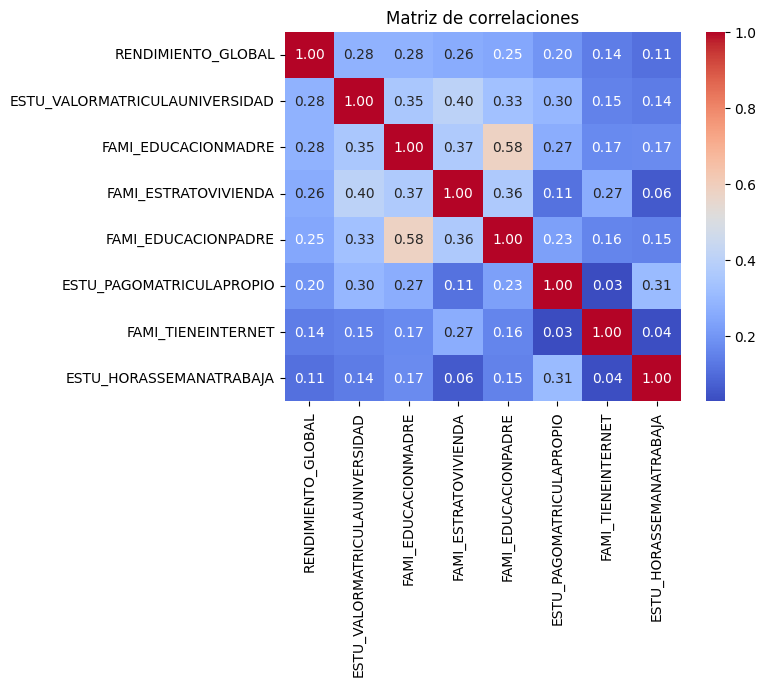

In [52]:
corr_matrix = np.abs(train.corr())
top = corr_matrix['RENDIMIENTO_GLOBAL'].sort_values(ascending=False)[0:8].index
corr_matrix = corr_matrix.loc[top, top]
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlaciones")
plt.show()

Es importante notar aqui al final que los valores obtenidos de correlacion han mejorado respecto a la exploración, esto puede ser en gran medida porque los valores fueron tratados de mejor manera por lo que puede que los pesos de cada valor tengan un mayor sentido.

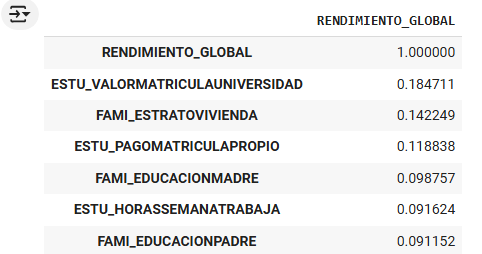
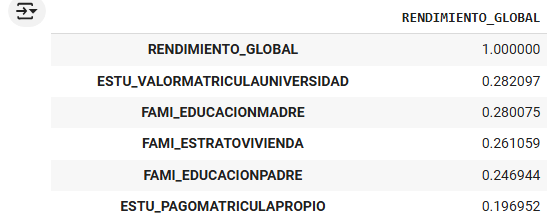

Por ultimo exportamos los datos

In [53]:
train.to_csv("preprocesados.csv", index=False)